In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from figure_labeler import *
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<h1 style="text-align:center;">Facebook's Network Dynamics for Enhanced Engagement</h1>
<hr>

<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref2]: #motiv
- [Motivation][ref2]

[ref3]: #dat_sor
- [Data Source][ref3]

[ref4]: #dat_prep
- [Data Preprocessing][ref4]

[ref5]: #dat_expl
- [Data Exploration][ref5]

[ref6]: #res_dis
- [Results and Discussions][ref6]

[ref7]: #conc
- [Conclusion and Recommendations][ref7]

[ref8]: #refe
- [References][ref8]

***

<a name="exec_summary"></a>
## Executive Summary

In this section, a brief summary of the notebook and the data story will be provided
***

As a data scientist employed by Facebook, tasked with analyzing a dataset containing anonymized user interactions, the analysis uncovered insightful patterns within the Facebook network. With 4039 nodes and 88234 edges, the network reveals a dense structure characterized by an average shortest path length of 3.6925, suggesting close connections between users. Degree distribution highlights the presence of both highly connected hubs and numerous users with few connections, while centrality measures underscore the predominance of low centrality values across most nodes. These findings offer valuable insights for the marketing department, guiding strategies to enhance user engagement and optimize marketing campaigns by targeting influential users and leveraging community structures within the network.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
## Problem Statement

This part will provide an explanation of the problem that needs to be solved.
***

To improve user engagement and identify influential users on Facebook, we aim to develop strategies that foster meaningful interactions and pinpoint key influencers within the platform's vast network. This entails enhancing engagement by encouraging active participation and promoting resonant content, while also leveraging network analysis techniques to identify individuals with significant influence over others. By addressing these challenges, Facebook can optimize its platform to drive user engagement and cultivate a thriving online community.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
## Motivation

In this section, the rationale behind solving the given problem will be explained.
***

Enhancing user engagement and identifying influential users on Facebook is essential for maintaining a vibrant and interactive platform. By fostering meaningful interactions and connecting users with relevant content, Facebook can enrich the user experience and increase overall satisfaction. Moreover, pinpointing influential users enables targeted marketing efforts and facilitates the spread of information within the network. 

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
## Data Source

In this section, the source of the data and a brief overview will be provided.
***

The Facebook100 Ego dataset offers insights into social network dynamics, particularly ego networks centered on individual users and their immediate connections. Techniques include community detection, degree distribution analysis, and exploring centrality measures like closeness and betweenness centrality to understand user roles in information flow.

*Click this for the dataset:* [Dataset Link](https://snap.stanford.edu/data/ego-Facebook.html?fbclid=IwAR2sSBM7AVa-nvj7gWZfnD3x314qBnH0XmeCwnpLyrivX4gDGiX9jqBuWgY)

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
## Data Preprocessing

In this section, there will be a table of the dataframe showing the edges (start_node and end_node), including the number of edges and nodes.

***

In [3]:
fb =  pd.read_csv("facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
fl.table_caption("Edges of the dataframe",
                 "Table showing that each edge creates a new row, with a start_node and end_node column.")
fb

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [4]:
G = nx.from_pandas_edgelist(fb, "start_node", "end_node")

In [5]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 4039
Number of edges: 88234


[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_expl"></a>
## Data Exploration

In this section, it will provide comprehensive visualizations of the network plot, degree distribution, degree centrality, closeness centrality, betweenness centrality, and eigenvector centrality.

***

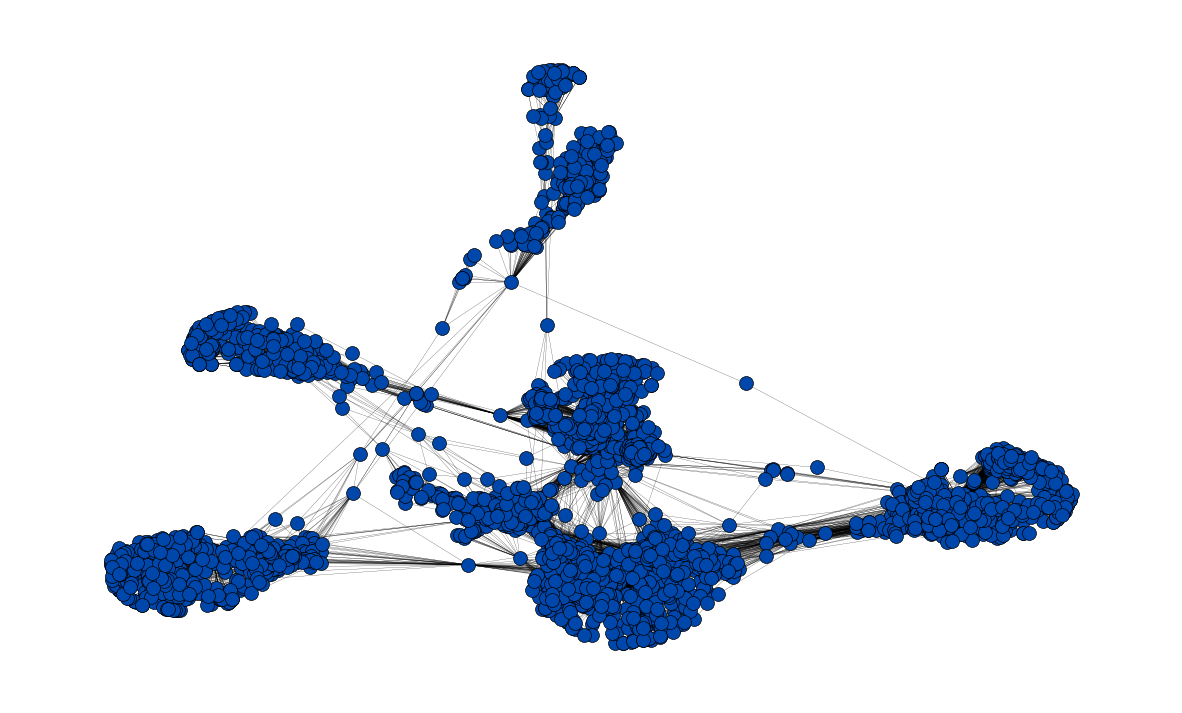

In [6]:
pos = nx.fruchterman_reingold_layout(G)

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 100, "with_labels": False, "width": 0.15, "node_color": "#0047AB", "edgecolors": "black", "linewidths": 0.5}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

fl.fig_caption("Network Plot Graph of G",
               "Plot showing the graph of G using fruchterman reingold layout.")
plt.show()

In [7]:
nx.average_shortest_path_length(G)

3.6925068496963913

This average is calculated by the average shortest path length in the graph G. Measuring how close the nodes are to each other.

In [8]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

shortest_path_length = float('inf')
longest_path_length = 0
shortest_path_node = None
longest_path_node = None

for source_node, path_lengths in shortest_path_lengths.items():
    for target_node, path_length in path_lengths.items():
        if source_node != target_node:  # Ignore paths where node is its own neighbor
            if path_length < shortest_path_length:
                shortest_path_length = path_length
                shortest_path_node = (source_node, target_node)
            if path_length > longest_path_length:
                longest_path_length = path_length
                longest_path_node = (source_node, target_node)

print("Shortest Path Length:", shortest_path_length, "between nodes:", shortest_path_node)
print("Longest Path Length:", longest_path_length, "between nodes:", longest_path_node)

Shortest Path Length: 1 between nodes: (0, 1)
Longest Path Length: 8 between nodes: (687, 3981)


In [9]:
degrees = [g for node, g in nx.degree(G)]
print(degrees)

g_min_graph = np.min(degrees)
g_max_graph = np.max(degrees)
g_avg_graph = np.mean(degrees)

print ('Minimum degree: ', g_min_graph)
print ('Maximum degree: ', g_max_graph)
print ('Average degree: ', g_avg_graph)

[347, 17, 10, 17, 10, 13, 6, 20, 8, 57, 10, 1, 1, 31, 15, 1, 9, 13, 1, 16, 15, 65, 11, 17, 16, 69, 68, 5, 13, 13, 17, 23, 6, 2, 5, 2, 11, 1, 9, 15, 44, 24, 2, 1, 6, 12, 5, 2, 22, 4, 11, 7, 2, 31, 8, 17, 78, 15, 12, 19, 8, 3, 26, 6, 7, 12, 15, 76, 9, 10, 2, 3, 24, 10, 1, 14, 3, 6, 9, 12, 23, 3, 34, 7, 13, 14, 6, 13, 20, 8, 2, 8, 21, 8, 22, 6, 9, 3, 49, 13, 9, 19, 6, 16, 32, 14, 8, 1045, 13, 37, 5, 14, 3, 40, 1, 21, 17, 6, 36, 62, 4, 12, 63, 18, 4, 4, 7, 16, 28, 7, 16, 7, 16, 18, 19, 10, 133, 16, 2, 9, 11, 28, 43, 12, 15, 2, 10, 6, 20, 14, 11, 7, 5, 2, 2, 3, 12, 3, 25, 14, 2, 25, 8, 6, 3, 11, 4, 7, 11, 38, 46, 22, 41, 12, 4, 17, 14, 11, 13, 3, 20, 10, 3, 2, 18, 26, 44, 16, 48, 7, 4, 3, 5, 5, 19, 9, 13, 16, 12, 47, 57, 4, 4, 57, 22, 2, 4, 3, 7, 1, 1, 30, 18, 39, 17, 1, 2, 8, 9, 6, 4, 8, 11, 27, 28, 10, 14, 15, 3, 6, 9, 21, 25, 2, 2, 5, 37, 7, 23, 59, 3, 2, 24, 8, 2, 5, 14, 3, 21, 24, 5, 14, 65, 3, 17, 2, 2, 18, 15, 8, 8, 38, 4, 7, 5, 27, 18, 2, 11, 6, 4, 73, 45, 9, 14, 10, 18, 65, 10, 2, 

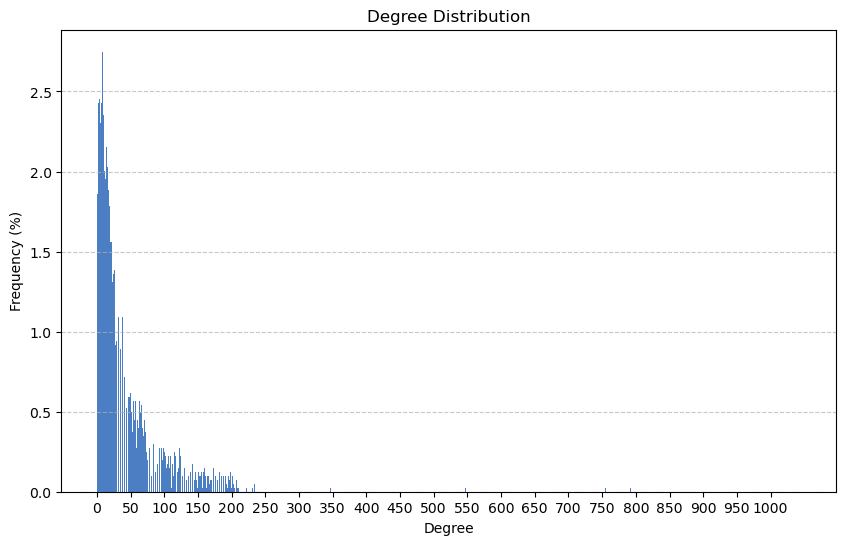

In [10]:
degree_distribution = nx.degree_histogram(G)

total_nodes = G.number_of_nodes()
degree_distribution_percentage = [count / total_nodes * 100 for count in degree_distribution]

plt.figure(figsize=(10, 6))
plt.bar(range(len(degree_distribution)), degree_distribution_percentage, width=0.8, color='#0047AB', alpha=0.7)

plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency (%)")
plt.xticks(range(0, len(degree_distribution), 50))
plt.grid(axis='y', linestyle='--', alpha=0.7)

fl.fig_caption("Network Degree Distribution",
               "Plot showing the distribution of node degrees and that the most nodes have a low degree.")
plt.show()

The graph displays the distribution of nodes in a network based on their degree. It demonstrates that the majority of nodes in the network have a low degree which means that the most nodes are connected to a few different nodes. 

In [11]:
nx.density(G)

0.010819963503439287

This density is calculated by the density of the graph G. Measuring how connected the nodes are to each other.

In [12]:
degree_centrality = nx.degree_centrality(G)
sorted_degrees = (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

num_nodes = sorted_degrees
for node, centrality in num_nodes:
    print(f"Node {node} - Degree Centrality is {centrality}")

Node 107 - Degree Centrality is 0.258791480931154
Node 1684 - Degree Centrality is 0.1961367013372957
Node 1912 - Degree Centrality is 0.18697374938088163
Node 3437 - Degree Centrality is 0.13546310054482416
Node 0 - Degree Centrality is 0.08593363051015354
Node 2543 - Degree Centrality is 0.07280832095096582
Node 2347 - Degree Centrality is 0.07206537890044576
Node 1888 - Degree Centrality is 0.0629024269440317
Node 1800 - Degree Centrality is 0.06067360079247152
Node 1663 - Degree Centrality is 0.058197127290737984
Node 1352 - Degree Centrality is 0.05794947994056463
Node 2266 - Degree Centrality is 0.05794947994056463
Node 483 - Degree Centrality is 0.057206537890044575
Node 348 - Degree Centrality is 0.05671124318969787
Node 1730 - Degree Centrality is 0.055968301139177806
Node 1985 - Degree Centrality is 0.0554730064388311
Node 1941 - Degree Centrality is 0.05522535908865775
Node 2233 - Degree Centrality is 0.0549777117384844
Node 2142 - Degree Centrality is 0.054730064388311045
N

Text(0, 0.5, 'Counts')

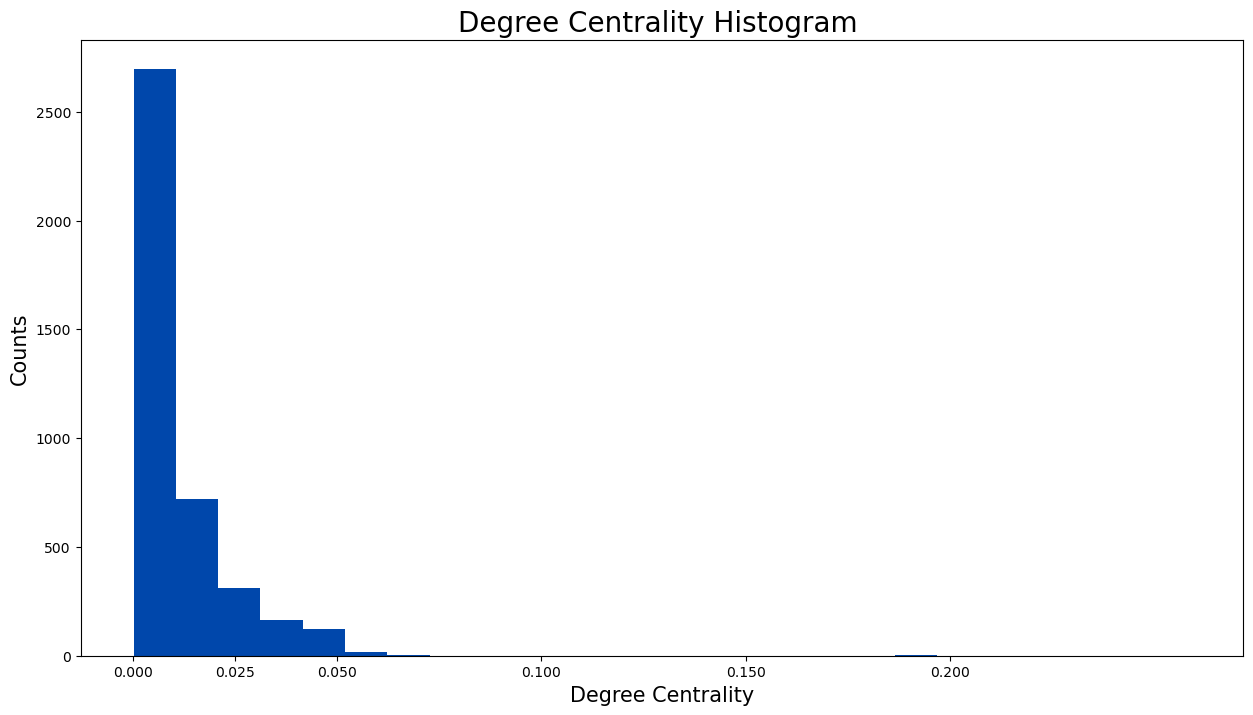

In [13]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25, color='#0047AB')
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 20}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 15})
fl.fig_caption("Histogram of Degree Centrality",
                "Bar graph dispalying the degree centrality values of nodes in the graph G.")
plt.ylabel("Counts", fontdict={"size": 15})

The graph displays that the most nodes in the network have a low degree centrality which implies that the nodes are connected to few other nodes. This can result in a situation in which a small number of nodes serve as hubs with numerous connections that can imply that people are more inclined to connect with those who are like them. 

Text(0.5, 1.0, 'Degree Centrality')

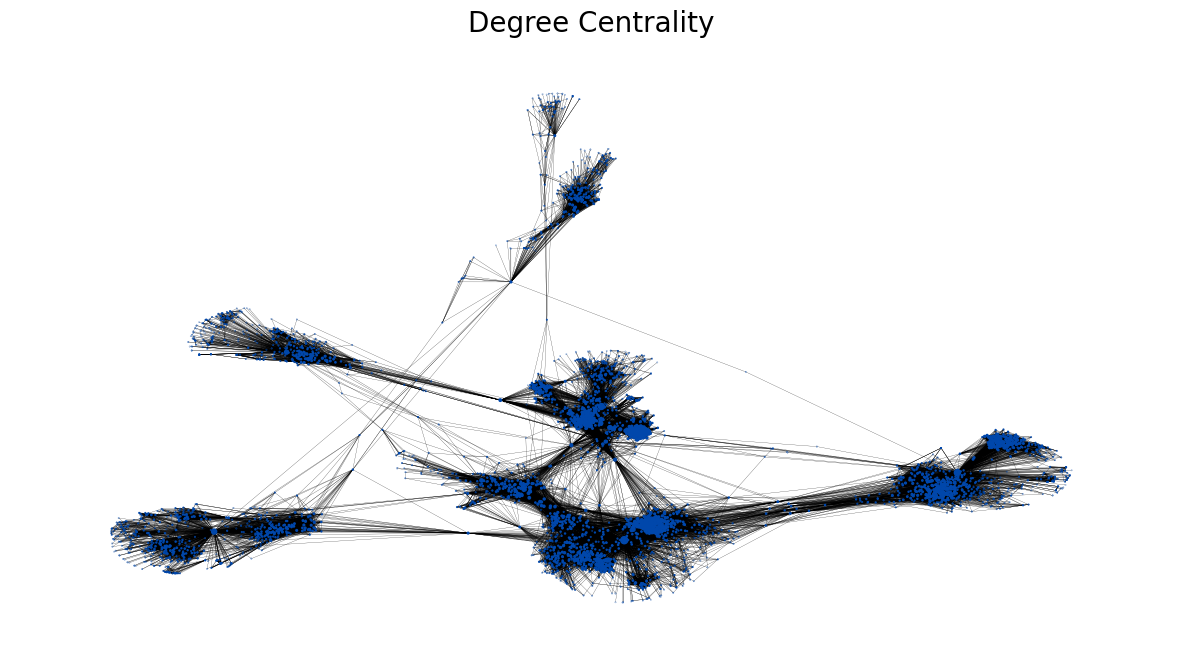

In [14]:
node_size = [
    v * 100 for v in degree_centrality.values()
] 
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15, node_color='#0047AB')
plt.axis("off")
fl.fig_caption("Network Graph of Degree Centrality",
                "Graph dispalying the degree centrality values of nodes in the graph G.")
plt.title("Degree Centrality", fontdict={"size": 20}, loc="center")

The graph shows the measure how many connections a user or a certain node has on a network. In association with the bar graph, the network graph reveals that the majority of users have a low degree centrality and that there is a lower fraction of users with a high degree centrality. This means that having low degree centrality occurs to have few facebook friends, while high degree centrality have large number of friends.

In [15]:
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness = (sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

num_nodes = sorted_betweenness
for node, centrality in num_nodes:
    print(f"Node {node} - Betweenness Centrality is {centrality}")

Node 107 - Betweenness Centrality is 0.4805180785560152
Node 1684 - Betweenness Centrality is 0.3377974497301992
Node 3437 - Betweenness Centrality is 0.23611535735892905
Node 1912 - Betweenness Centrality is 0.2292953395868782
Node 1085 - Betweenness Centrality is 0.14901509211665306
Node 0 - Betweenness Centrality is 0.14630592147442917
Node 698 - Betweenness Centrality is 0.11533045020560802
Node 567 - Betweenness Centrality is 0.09631033121856215
Node 58 - Betweenness Centrality is 0.08436020590796486
Node 428 - Betweenness Centrality is 0.06430906239323866
Node 563 - Betweenness Centrality is 0.06278022847240787
Node 860 - Betweenness Centrality is 0.05782590687091168
Node 414 - Betweenness Centrality is 0.04763337297172344
Node 1577 - Betweenness Centrality is 0.03978470502937034
Node 348 - Betweenness Centrality is 0.03799809748091909
Node 1718 - Betweenness Centrality is 0.03734287067796221
Node 686 - Betweenness Centrality is 0.029721898375122513
Node 594 - Betweenness Central

Text(0, 0.5, 'Counts')

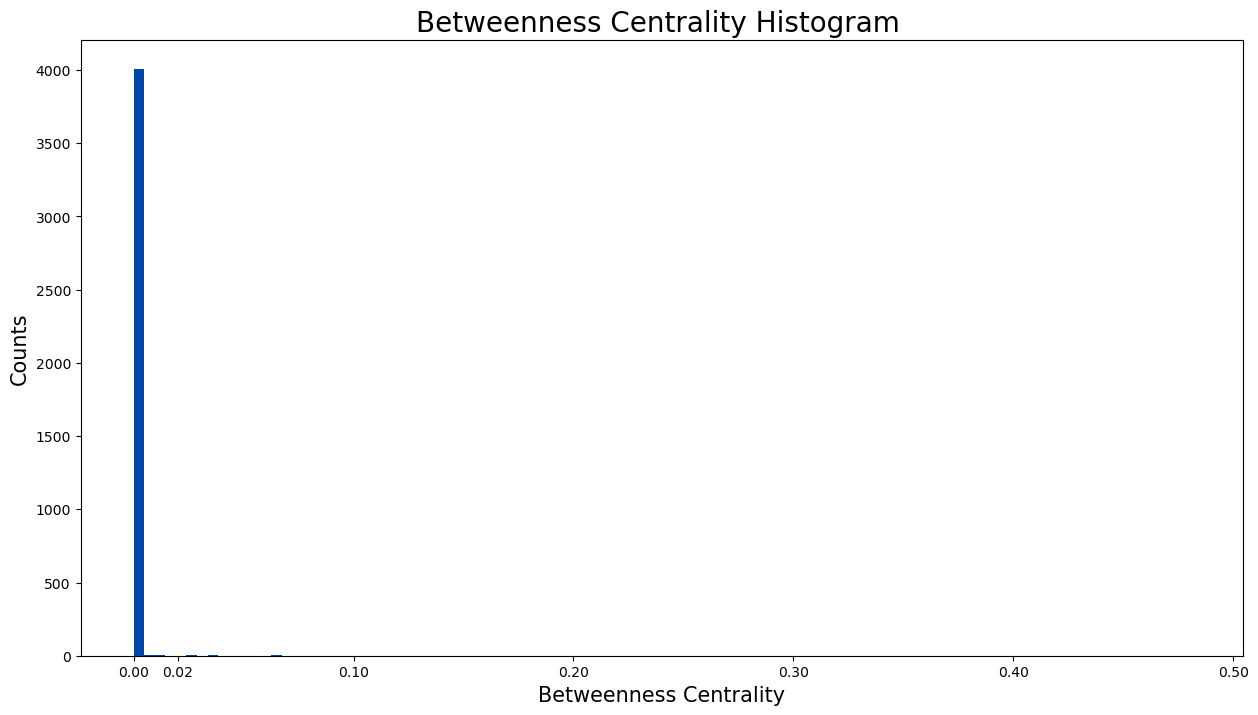

In [16]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100, color="#0047AB")
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5]) 
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 20}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 15})
fl.fig_caption("Histogram of Betweenness Centrality",
                "Bar graph dispalying the betweenness centrality values of nodes in the graph G.")
plt.ylabel("Counts", fontdict={"size": 15})

The graph dispalys the betweenness centrality of nodes in a network reflecting Facebook user relationships. The illustration emphasize that the majority of nodes have a low betweenness centrality that implies that many of the Facebook users do not typically take the shortest pathways which means that ata may not always travel directly via individuals or the nodes.

Text(0.5, 1.0, 'Betweenness Centrality')

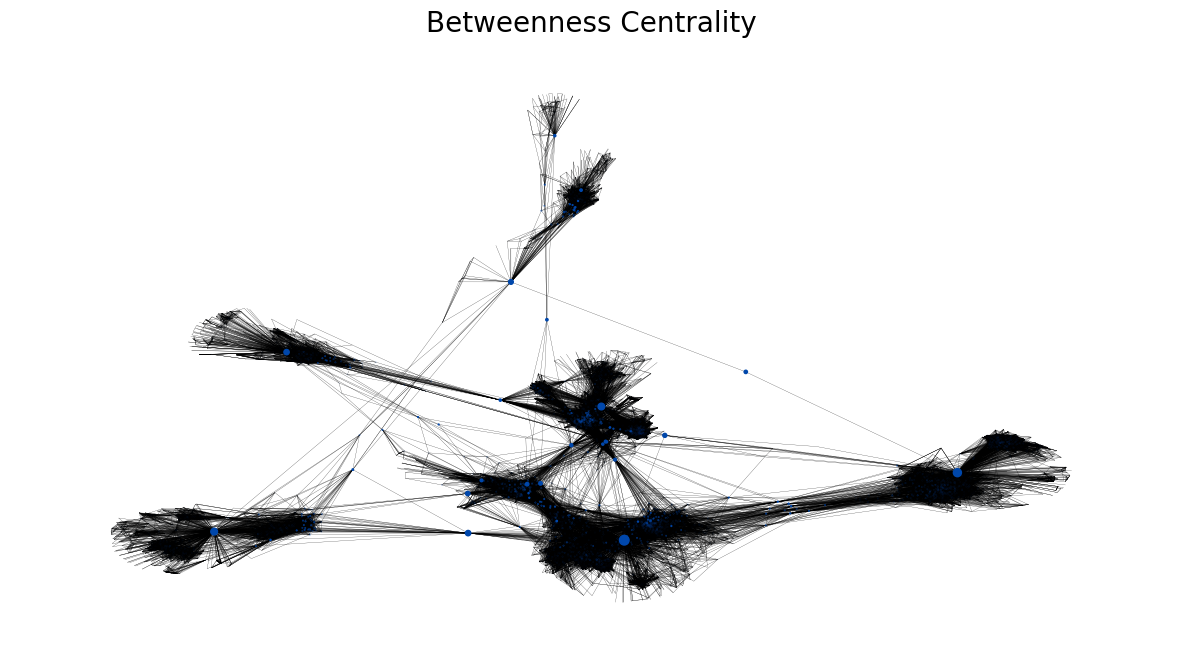

In [17]:
node_size = [
    v * 100 for v in betweenness_centrality.values()
] 
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15, node_color='#0047AB')
plt.axis("off")
fl.fig_caption("Network Graph of Betweenness Centrality",
                "Graph dispalying the betweenness centrality values of nodes in the graph G.")
plt.title("Betweenness Centrality", fontdict={"size": 20}, loc="center")

The network graph illustrates that the degree of thickness of the edges shows to reflect the strength of the links between nodes. This also represents that the network structure appeats to the nodes or users have many various connections while the other nodes have fewer connections.

In [18]:
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness = (sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))

num_nodes = sorted_closeness
for node, centrality in num_nodes:
    print(f"Node {node} - Closeness Centrality is {centrality}")

Node 107 - Closeness Centrality is 0.45969945355191255
Node 58 - Closeness Centrality is 0.3974018305284913
Node 428 - Closeness Centrality is 0.3948371956585509
Node 563 - Closeness Centrality is 0.3939127889961955
Node 1684 - Closeness Centrality is 0.39360561458231796
Node 171 - Closeness Centrality is 0.37049270575282134
Node 348 - Closeness Centrality is 0.36991572004397216
Node 483 - Closeness Centrality is 0.3698479575013739
Node 414 - Closeness Centrality is 0.3695433330282786
Node 376 - Closeness Centrality is 0.36655773420479304
Node 475 - Closeness Centrality is 0.3661920740001814
Node 566 - Closeness Centrality is 0.36496746203904556
Node 1666 - Closeness Centrality is 0.3647037572254335
Node 1534 - Closeness Centrality is 0.36460496613995486
Node 484 - Closeness Centrality is 0.3631621548700423
Node 353 - Closeness Centrality is 0.36309684380901
Node 1171 - Closeness Centrality is 0.3624450228884301
Node 651 - Closeness Centrality is 0.36228243315987796
Node 420 - Closenes

Text(0, 0.5, 'Counts')

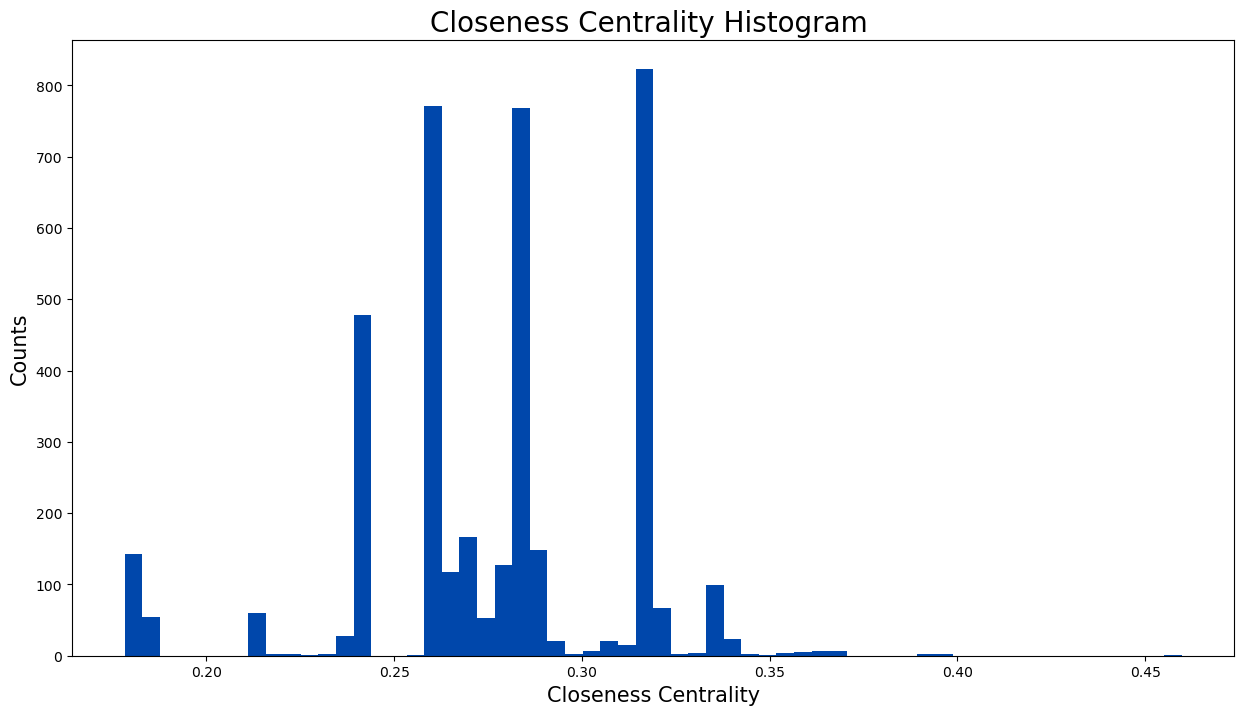

In [19]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60, color="#0047AB")
plt.title("Closeness Centrality Histogram ", fontdict={"size": 20}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 15})
fl.fig_caption("Histogram of Closeness Centrality",
                "Bar graph dispalying the Closeness centrality values of nodes in the graph G.")
plt.ylabel("Counts", fontdict={"size": 15})

The bar graph shows the distribution of closeness centrality for the values of nodes in Facebook network. The majority of nodes in the network have a proximity centrality score of 0.25 to 0.30 which means that most of the users have good conenction to one onether, since lower centrality means that there are lower connection of nodes. 

Text(0.5, 1.0, 'Closeness Centrality')

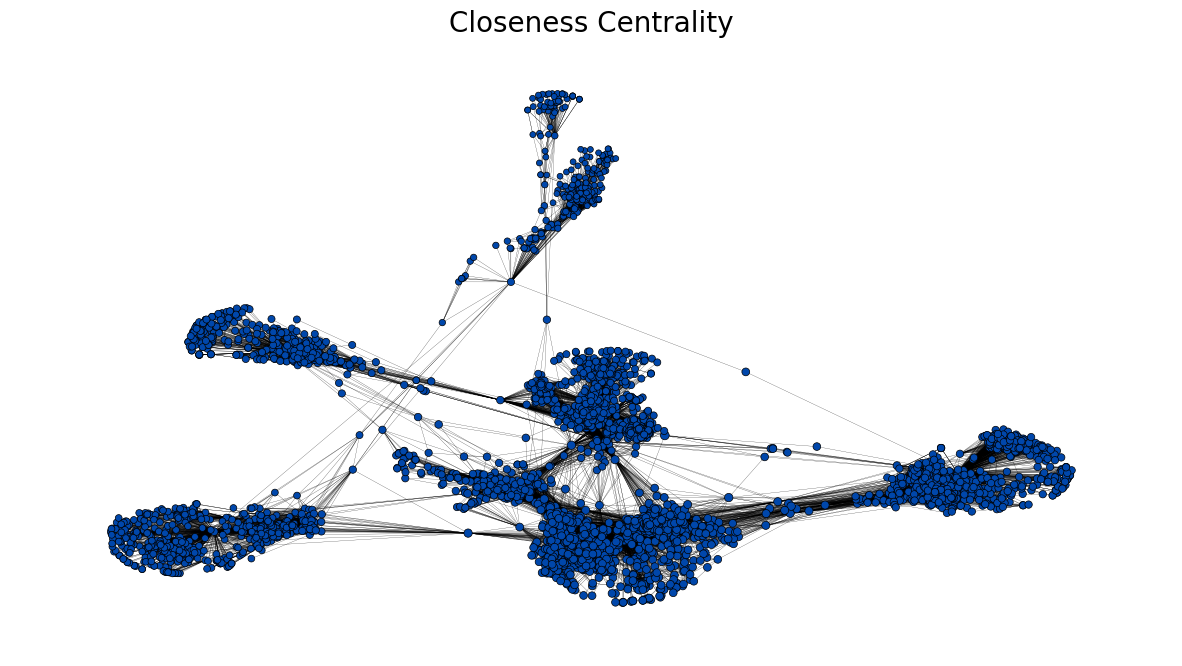

In [20]:
node_size = [
    v * 100 for v in closeness_centrality.values()
] 
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15, node_color='#0047AB', edgecolors="black", linewidths=0.5)
plt.axis("off")
fl.fig_caption("Network Graph of Closeness Centrality",
                "Graph dispalying the closeness centrality values of nodes in the graph G.")
plt.title("Closeness Centrality", fontdict={"size": 20}, loc="center")

The netowrk graph has multiple groupings of nodes. The nodes that are inside a region implies that they aquire a high closeness centrality as mentioned in the bar graph discussion which means that they are connected to one another. Meanwhile, the nodes that are not within a region have lower closeness centrality implying that they are not related or connected to other nodes or users.

In [21]:
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector = (sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))

num_nodes = sorted_eigenvector
for node, centrality in num_nodes:
    print(f"Node {node} - Eigenvetor Centrality is {centrality}")

Node 1912 - Eigenvetor Centrality is 0.09540696149067629
Node 2266 - Eigenvetor Centrality is 0.08698327767886552
Node 2206 - Eigenvetor Centrality is 0.08605239270584342
Node 2233 - Eigenvetor Centrality is 0.08517340912756598
Node 2464 - Eigenvetor Centrality is 0.08427877475676092
Node 2142 - Eigenvetor Centrality is 0.08419311897991795
Node 2218 - Eigenvetor Centrality is 0.0841557356805503
Node 2078 - Eigenvetor Centrality is 0.08413617041724977
Node 2123 - Eigenvetor Centrality is 0.08367141238206224
Node 1993 - Eigenvetor Centrality is 0.0835324284081597
Node 2410 - Eigenvetor Centrality is 0.08351751162148188
Node 2244 - Eigenvetor Centrality is 0.08334186008004285
Node 2507 - Eigenvetor Centrality is 0.08327311568144907
Node 2240 - Eigenvetor Centrality is 0.08305685135432211
Node 2340 - Eigenvetor Centrality is 0.08305335409204805
Node 2229 - Eigenvetor Centrality is 0.08300773533630396
Node 1985 - Eigenvetor Centrality is 0.08273780994613865
Node 2088 - Eigenvetor Centrality

Text(0, 0.5, 'Counts')

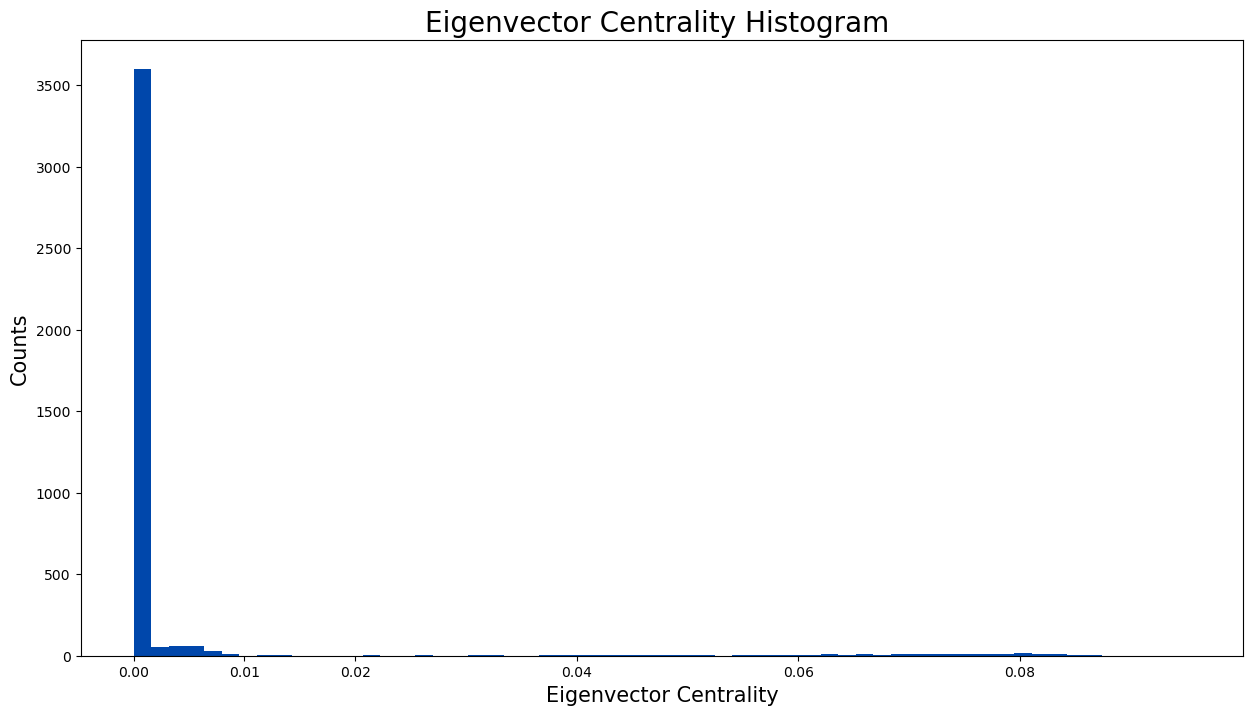

In [22]:
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60, color="#0047AB")
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 20}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 15})
fl.fig_caption("Histogram of Eigenvector Centrality",
                "Bar graph dispalying the eigenvector centrality values of nodes in the graph G.")
plt.ylabel("Counts", fontdict={"size": 15})

The eigenvectory centrality measures the influence applied by a node. A high eigenvector centrality has a connection to other users who are just as important. In the graph, majority of the nodes underlines on the 0.00 ro 0.01 eigenvector centrality which means that most users are less influential or less connected towards one another. But it can be also observed that there is a slight count around 0.08 that are influential to one another in the network. 

Text(0.5, 1.0, 'Eigenvector Centrality')

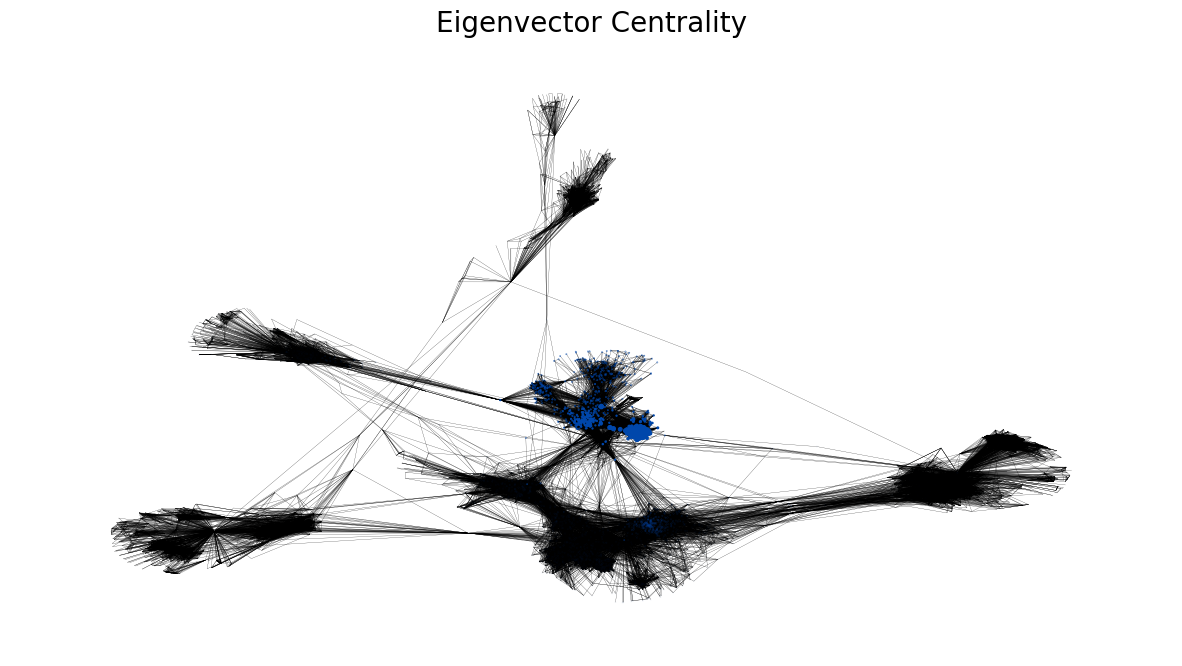

In [23]:
node_size = [
    v * 100 for v in eigenvector_centrality.values()
]
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15, node_color='#0047AB')
plt.axis("off")
fl.fig_caption("Network Graph of Eigenvector Centrality",
                "Graph dispalying the eigenvector centrality values of nodes in the graph G.")
plt.title("Eigenvector Centrality", fontdict={"size": 20}, loc="center")

The network graph indicates that influence is concentrated. Users that interact with other influential users are more likely to be influential themselves, thus the implication of a thick edges.

[ref]: #top
[Back to Table of Contents][ref]

<a name="res_dis"></a>
## Results and Discussions

In this section, results of all the graphs will be provided, along with a brief discussion.
***

**Network Plot Graph of G:**
The network plot graph of G with an average shortest path length of 3.69 indicates that the nodes in the graph are relatively well-connected, with paths between them being neither too short nor too long on average. The shortest path length of 1 between nodes (0, 1) suggests that there are direct connections between some nodes, facilitating efficient communication or interaction. On the other hand, the longest path length of 8 between nodes (687, 3981) signifies that there are also some distant connections in the network. With a minimum degree of 1 and a maximum degree of 1045, the graph exhibits a wide range of connectivity among its nodes, while the average degree of 43.69 indicates a moderate level of interconnectedness overall. This balance between short and long paths, along with varying degrees of connectivity, suggests a complex yet navigable network structure.

**Network Degree Distribution:**
The network degree distribution plot illustrates the distribution of node degrees in the graph G, highlighting the frequency of nodes with different degrees. With the majority of nodes having a low degree, the graph depicts a sharp peak in frequency for degrees ranging from 0 to 30. This indicates that most nodes in the network are connected to only a few other nodes, suggesting a sparse connectivity pattern where many nodes have relatively few connections. As the degree increases beyond 30 and up to around 250, the frequency gradually decreases, indicating fewer nodes with intermediate degrees of connectivity. Beyond a degree of 250, the frequency drops sharply, with very few nodes having higher degrees, possibly indicating a few highly connected nodes or hubs in the network. Overall, the distribution portrays a network where most nodes have limited connections, with only a small number of nodes forming highly connected clusters or hubs, contributing to a relatively low density of connections between nodes.

**Histogram of Degree Centrality:**
The histogram of degree centrality provides insight into the distribution of node centrality values in the graph G, indicating how central or influential nodes are based on their degree centrality scores. The graph reveals that the majority of nodes in the network have a low degree centrality, as evidenced by the peak in counts for centrality values ranging from 0.000 to 0.015. This suggests that most nodes are connected to only a few other nodes, implying a decentralized network structure where many nodes have limited influence. However, as the degree centrality increases beyond 0.015, the counts gradually decrease, indicating fewer nodes with higher centrality scores. This pattern suggests the presence of a few highly central nodes or hubs that serve as key connectors within the network. Such hubs can play a crucial role in facilitating communication and information flow between different parts of the network, potentially indicating that individuals are more likely to connect with others who share similar characteristics or interests. Overall, the histogram underscores the importance of both highly central nodes and the prevalence of nodes with lower centrality in shaping the network's structure and dynamics.

**Network Graph of Degree Centrality:**
The network graph of degree centrality provides a visual representation of the connectivity of nodes in the graph G based on their degree centrality values. Degree centrality measures the number of connections or links that a node has within the network, reflecting its importance or influence. In conjunction with the bar graph, the network graph illustrates that the majority of users or nodes in the network have a low degree centrality, indicating that they have relatively few connections. Conversely, there is a smaller fraction of users with a high degree centrality, suggesting that they possess a larger number of connections or friends within the network. This disparity highlights the heterogeneity in the distribution of connections among users, with some individuals being more central and influential than others. Specifically, nodes with high degree centrality can be likened to individuals with a large number of friends in a social network, while those with low degree centrality may have fewer social connections. Overall, the network graph underscores the importance of degree centrality in characterizing the structure and dynamics of the network, highlighting variations in node connectivity and influence.

**Histogram of Betweenness Centrality:**
The histogram of betweenness centrality presents a bar graph illustrating the distribution of betweenness centrality values among nodes in the graph G, representing Facebook user relationships. The graph highlights that a significant portion of nodes exhibit low betweenness centrality values, with approximately 4000 nodes having betweenness centrality values in the range of 0.00 to 0.01. Conversely, as the betweenness centrality values increase beyond 0.01, the frequency of nodes sharply declines, with only a few nodes having betweenness centrality values between 0.02 and 0.50. This distribution suggests that the majority of Facebook users are not frequently positioned on the shortest paths between other users or nodes in the network. Consequently, data may not consistently flow through these individuals or nodes, indicating that alternative pathways are often utilized for communication or interaction within the network.

**Network Graph of Betweenness Centrality:**
The network graph depicting betweenness centrality values offers a visual representation of the strength of connections between nodes in graph G. The thickness of the edges in the graph indicates the relative strength of links between nodes, with thicker edges representing stronger connections. This visual representation suggests that the network structure exhibits nodes with diverse and numerous connections, as indicated by thicker edges, while other nodes appear to have fewer connections, as indicated by thinner edges. Overall, the graph provides insights into the distribution of betweenness centrality values across the network, highlighting the varying degrees of influence and connectivity among nodes.

**Histogram of Closeness Centrality:**
The histogram of closeness centrality values provides insight into the distribution of node proximity within the Facebook network represented by graph G. The graph illustrates that the majority of nodes in the network have closeness centrality scores ranging from 0.25 to 0.30. This indicates that most users in the network have relatively short average distances to other users, suggesting strong connectivity and efficient information flow. Higher closeness centrality scores imply closer proximity to other nodes in the network, reflecting stronger connections and more direct paths of communication. Conversely, lower closeness centrality scores indicate nodes that are less centrally located within the network and may have longer average distances to reach other nodes. Overall, the histogram highlights the distribution of closeness centrality values and provides insights into the connectivity and efficiency of information dissemination within the Facebook network.

**Network Graph of Closeness Centrality:**
The network graph depicting closeness centrality values of nodes in graph G reveals distinct groupings of nodes. Nodes clustered closely together within specific regions indicate high closeness centrality, suggesting strong interconnectedness and short average distances to other nodes within those clusters. These groupings represent cohesive sub-networks where nodes are tightly connected and communication pathways are efficient. Conversely, nodes located outside these clusters exhibit lower closeness centrality, indicating weaker connectivity and longer average distances to other nodes. These isolated nodes may represent peripheral users or less active participants within the network. Overall, the network graph provides a visual representation of the varying degrees of closeness centrality across nodes, highlighting both cohesive clusters and more dispersed regions within the Facebook network.

**Histogram of Eigenvector Centrality:**
The histogram of eigenvector centrality values for nodes in graph G provides insight into the influence and connectivity of users within the network. Eigenvector centrality measures the importance of a node based on its connections to other important nodes. In this graph, the majority of nodes exhibit low eigenvector centrality, with a concentration of values between 0.00 and 0.01. This suggests that most users have relatively low influence and are less connected to other influential users. However, there is a noticeable peak around 0.08, indicating a subset of nodes that are more influential and have stronger connections within the network. These nodes may play significant roles in facilitating communication or information flow within the network, acting as hubs or central figures. Overall, the histogram highlights the distribution of eigenvector centrality values, emphasizing the varying levels of influence and connectivity among users in the Facebook network.

**Network Graph of Eigenvector Centrality:**
The network graph of eigenvector centrality values in graph G reveals patterns of influence and connectivity among users within the network. Nodes with higher eigenvector centrality, representing greater influence, are depicted with thicker edges, indicating stronger connections to other influential nodes. This visual representation suggests the presence of clusters or groups of interconnected users who mutually reinforce each other's influence. Nodes that are centrally located within these clusters are likely to play pivotal roles in information dissemination or social dynamics within the network. Conversely, nodes with lower eigenvector centrality appear less interconnected and influential, forming peripheral or isolated components within the network. Overall, the network graph provides insights into the structure of influence and connectivity in the Facebook network, highlighting the presence of influential clusters and the varying degrees of influence among users.


[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
## Conclusion and Recommendations
In this section, the conclusion of the results and some recommendations will be provided.
***

In conclusion, the analysis of the network characteristics of graph G reveals several key findings. The network exhibits a balanced connectivity pattern, with both short and long paths between nodes, indicating a moderate level of interconnectedness. Degree distribution analysis highlights a predominantly sparse network structure, with most nodes having low degrees of connectivity and a few highly connected nodes acting as hubs. Degree centrality analysis further emphasizes this pattern, with the majority of nodes having low centrality scores and a small fraction of nodes possessing high centrality, indicating variations in influence and connectivity. Betweenness centrality analysis suggests that while many nodes are not frequently positioned on shortest paths, alternative communication pathways are utilized within the network. Closeness centrality analysis indicates strong connectivity and efficient information flow among nodes, with cohesive clusters of closely connected nodes. Finally, eigenvector centrality analysis reveals patterns of influence and connectivity, with influential nodes forming clusters and less influential nodes occupying peripheral positions within the network. Based on these findings, it is recommended to focus on enhancing connections among less connected nodes to promote network cohesion and information dissemination. Additionally, identifying and leveraging influential nodes can facilitate targeted communication strategies within the network, maximizing information diffusion and engagement.

[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
## References
***

*McAuley, J., & Leskovec, J. (2012). Learning to Discover Social Circles in Ego Networks. In *NIPS.* Retrieved from https://snap.stanford.edu/data/ego-Facebook.html?fbclid=IwAR2sSBM7AVa-nvj7gWZfnD3x314qBnH0XmeCwnpLyrivX4gDGiX9jqBuWgg*

[ref]: #top
[Back to Table of Contents][ref]

***
***